# Prereqs & Data

In [3]:
!pip install netCDF4

     |████████████████████████████████| 4.7MB 6.0MB/s 
     |████████████████████████████████| 317kB 37.8MB/s 


In [4]:
from pylab import *
from random import uniform
from netCDF4 import Dataset
from ftplib import FTP
import pandas as pd
import matplotlib.patches as mpatches
from PIL import Image
import io
# import numpy as np
# import matplotlib

In [3]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Obtain moisture data
# for i in range (1950, 2021):
#     ftp = FTP('ftp2.psl.noaa.gov')
#     ftp.login()
#     ftp.cwd('Datasets/ncep.reanalysis.dailyavgs/surface_gauss')
#     file = open("y%s.nc" %i, 'wb')#~/Downloads/ncep/
#     ftp.retrbinary('RETR soilw.0-10cm.gauss.%s.nc' %i, file.write)
#     ftp.quit()

In [ ]:
# #generate command to run on Linux
# command = "ncrcat"
# for i in range(1950,2021):
#     command += " y"
#     command += str(i)
#     command += ".nc"
# command += " moisture.nc"
# print(command)

ncrcat y1950.nc y1951.nc y1952.nc y1953.nc y1954.nc y1955.nc y1956.nc y1957.nc y1958.nc y1959.nc y1960.nc y1961.nc y1962.nc y1963.nc y1964.nc y1965.nc y1966.nc y1967.nc y1968.nc y1969.nc y1970.nc y1971.nc y1972.nc y1973.nc y1974.nc y1975.nc y1976.nc y1977.nc y1978.nc y1979.nc y1980.nc y1981.nc y1982.nc y1983.nc y1984.nc y1985.nc y1986.nc y1987.nc y1988.nc y1989.nc y1990.nc y1991.nc y1992.nc y1993.nc y1994.nc y1995.nc y1996.nc y1997.nc y1998.nc y1999.nc y2000.nc y2001.nc y2002.nc y2003.nc y2004.nc y2005.nc y2006.nc y2007.nc y2008.nc y2009.nc y2010.nc y2011.nc y2012.nc y2013.nc y2014.nc y2015.nc y2016.nc y2017.nc y2018.nc y2019.nc y2020.nc moisture.nc


In [152]:
# surface_temp = Dataset("air.sig995.2020.nc", 'r', format='NETCDF4')
moist_data=Dataset("drive/MyDrive/fungi/moisture.nc", format='NETCDF4')

# air_lats = surface_temp.variables['lat'][:]
# air_lons = surface_temp.variables['lon'][:]
# time = surface_temp.variables['time'][:]
# air = surface_temp.variables['air'][:]
moistures=moist_data.variables['soilw'][:]
moist_lats = moist_data.variables['lat'][:]
moist_lons = moist_data.variables['lon'][:]

KeyboardInterrupt: ignored

In [5]:
# def get_air_lon_index(x):
#   return np.abs(air_lons - x).argmin()
# def get_air_lat_index(y):
#   return np.abs(air_lats - y).argmin()
def get_moist_lon_index(x):
  return np.abs(moist_lons - x).argmin()
def get_moist_lat_index(y):
  return np.abs(moist_lats - y).argmin()
def get_tindex(t):
  return t%365
# def get_temp(t,x,y):
#   return air[get_tindex(t),get_air_lat_index(y),get_air_lon_index(x)]-273.15
def get_mpa(t, x, y):
  if (np.ma.is_masked(moistures[t,get_moist_lat_index(y),get_moist_lon_index(x)])):
    #print("ERROR")
    return -1 #error condition
  volume=moistures[t,get_moist_lat_index(y),get_moist_lon_index(x)]
  return (((0.435-volume)*4)**4)

In [ ]:
print(get_mpa(39,-97.268,52.978))
print(get_mpa(0,37,55))
print(get_mpa(0,40,24))
print(get_mpa(0,-58,-9))

0.357409285961823
0.008585725319544477
0.710182181981429
-1


# Differential Equation Model

25933

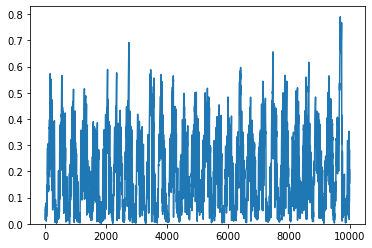

In [120]:
plotdata=[get_mpa(t,-97.268,52.978) for t in range(10000)]
plot(range(10000),plotdata)
plt.ylim(0)
len(moistures)

In [ ]:
moistures.max()

0.43400002

In [ ]:
get_mpa(500,-100,40)

0.1902073869588943

In [ ]:
moistures.max()

0.43400002

In [7]:
data=pd.read_csv("fungi.csv")
data.index=data["isolate"]
elo=data["hyphae"]*10
A0=np.ones(len(elo))
A0=A0/sum(A0)
e=np.array(data["hyphae"])*0.001
opt_m=np.array(data["optimalmoisture"])
niches_m=np.array(data["nichemoisture"])
species=np.array(data["isolate"])

In [ ]:
x=99
y=67
mean([get_mpa(t, x, y) for t in range(10000)])

0.014962262595828096

In [ ]:
#locations:
boreal=(99,67,data["decomplow"])
arid=(-104,27,data["decomphigh"])
semiarid=(-103,37,data["decompmid"])
temperate=(-85,33,data["decompmid"])
tropical=(24,-2,data["decomphigh"])

In [128]:
x,y,rd=climate_coords[0][0]#[2]

# x=27.465
# y=0.278
# rd=1-(1-rd/100)**(1/122)

v0=1

#moisture=0.5
temp=25

l=0.1/365 #vegetation growth rate

h=1
years=20
days=years*365
run_time = int(days/h)

def initialize():
  global v, A, v_result, A_result, f_result, t_list, moisture_result
  v=v0
  A=A0
  t_list=[]
  # for i in range(len(A)):
  #   opt_t.append(uniform(20,30))
  #   #opt_m.append(uniform(0.1,0.9))
  #   niches_t.append(uniform(10,30))
  #   #niches_m.append(uniform(1,4))
  
  A_result=[]
  v_result=[]
  f_result=[]
  moisture_result=[]

def observe():
  global v, A, f, v_result, A_result, t, t_list, f_result, moisture, moisture_result
  v_result.append(v)
  A_result.append(A)
  f_result.append(f)
  moisture_result.append(moisture)

  t_list.append(t*h/365)

def update():
  global v, A, f, moisture, clim_effect_comp, probabilities
  day=t*h
  variationfactor= 1 if day<5000 else 0
  moisture=get_mpa(int(day) ,x,y)+(day/5000) #day/10000#math.sin(day * (360/365)*math.pi/180)*variationfactor - 1 -(max(day-10000,0)/100 * 0.1) #
  #temp=get_temp(day%365,x,y)

  clim_effect=[]
  for i in range(len(A)):
    clim_effect.append(max(1-((moisture-opt_m[i])/niches_m[i])**2,0.1))
  clim_effect=np.array(clim_effect)
  #clim_effect_comp[clim_effect_comp<0]=0
  
  probabilities=[]
  elo_adj=elo*clim_effect
  for i in range(len(elo)):
    probabilitiesi=[]
    for j in range(len(elo)):
      probabilitiesi.append(1/(1+10**(0-(elo_adj[i]-elo_adj[j])/400)))
    probabilities.append(probabilitiesi)

  
  weightedavg=sum([a*b*1 for a,b,c in zip(rd, A, clim_effect)])
  f=v*(weightedavg)
  if(f>1):
    f=1
  vstep=-f + l



  nextAis=[]
  for i in range(len(A)):
    compsum=0
    for j in range(len(A)):
      compsum+=(1-probabilities[i][j])*2*A[j]
    adjust=1*v*clim_effect[i]-compsum #could multiply the first term by the clim_effect
    drdt=e[i] #*clim_effect[i]
    # if(A[i]<0):
    #   A[i]=0.0001 #so that they don't die out
    Astep=sqrt(A[i])*drdt*sqrt(math.pi)*2 * adjust
    if(clim_effect[i]<0 and adjust<0):
      Astep*=-1
    nextAi=A[i]+Astep*h
    if(nextAi<=0):
      nextAi=0.002
    if(nextAi>1):
      nextAi=1
    nextAis.append(nextAi)
  
  nextv=v+vstep*h
  if(nextv<0):
    nextv=0.001

  v, A = nextv, nextAis

initialize()
for t in range(run_time):
    update()
    observe()
    if(t/365 % 5==0):
      print(t/365)

0.0
5.0
10.0
15.0


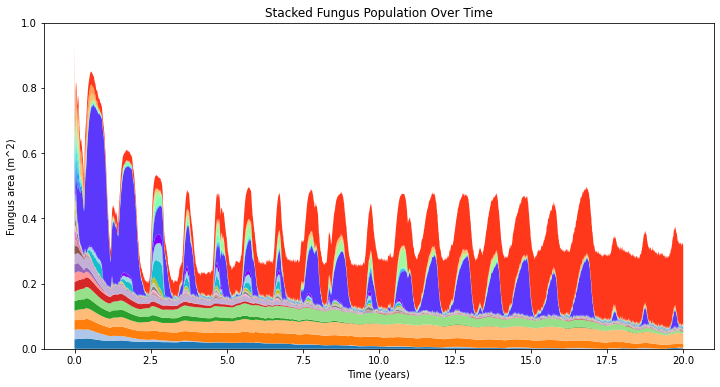

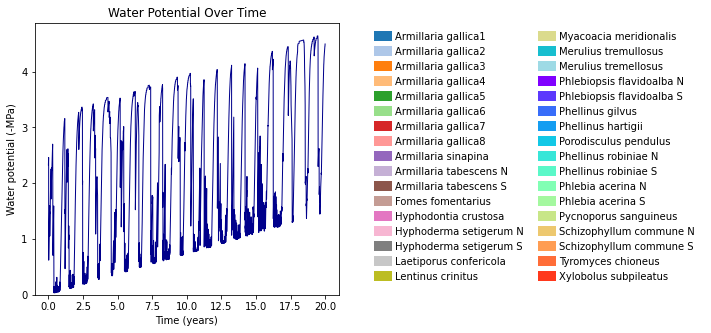

In [151]:


# plt.subplot(2, 2, 1)
# plot(t_list,v_result, color='darkgreen',label='dragon weight',linewidth=4)
# plt.xlabel("Time (years)")
# plt.ylabel("Vegetation density")
# plt.ylim(0,1)
# #legend(loc='upper right')
# title('Dead Vegetation Density Over Time')



#colors=cm.get_cmap('tab20')



stack=plt.figure(figsize=(12,6))
plt.stackplot(t_list,np.array(A_result).T,colors=np.array(colors))
plt.xlabel("Time (years)")
plt.ylabel("Fungus area (m^2)")
plt.ylim(0,1)
plt.title("Stacked Fungus Population Over Time")
plt.savefig("full2.png",dpi=400,bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,5))

# plt.subplot(1, 2, 1)
# plot(t_list,np.array(f_result), color='darkgreen',label='dragon weight',linewidth=4)#np.array(f_result)/np.array(v_result)
# plt.xlabel("Time (years)")
# plt.ylabel("Decomposition (m^2)")
# plt.ylim(0)
# #legend(loc='upper right')
# title('Density of Dead Vegetation Decomposed Over Time')

plt.subplot(1, 2, 1)
plot(t_list,moisture_result, color='darkblue',label='dragon weight',linewidth=1)
plt.xlabel("Time (years)")
plt.ylabel("Water potential (-MPa)")
#legend(loc='upper right')
title('Water Potential Over Time')
plt.ylim(0)



ax=plt.subplot(1, 2, 2)
#colors=['black','red']
for i in range(len(A)):
  plot(t_list,np.array(A_result)[:,i], color=colors[i],label='Fungus '+str(i), linewidth=4)
  y = ax.lines[i].get_ydata()[-1]
  # if(y>0.05):
  #   annotate(species[i],xy=(1,y),xytext=(6,0), color="black", 
  #                 xycoords = ax.get_yaxis_transform(), textcoords="offset points",
  #                 size=12, va="center")
plt.xlabel("Time (years)")
plt.ylabel("Fungus density")
plt.ylim(0,1)
#legend(loc='best')
title('Fungus Population Over Time')
plt.rcParams['legend.handlelength'] = 0.8
plt.rcParams['legend.handleheight'] = 1
plt.subplot(2,2,2)
leg=plt.legend(ax.lines,data["isolate"],ncol=2,frameon=False)
for legobj in leg.legendHandles:
    legobj.set_linewidth(10)
plt.axis("off")

plt.savefig("full1.png",dpi=400,bbox_inches='tight')
plt.show()


In [93]:
climate_coords[0][0]

[16.79521317668346, 13.859699822348407, isolate
 Armillaria gallica1          0.001538
 Armillaria gallica2          0.001372
 Armillaria gallica3          0.000955
 Armillaria gallica4          0.001075
 Armillaria gallica5          0.000791
 Armillaria gallica6          0.004112
 Armillaria gallica7          0.000796
 Armillaria gallica8          0.000935
 Armillaria sinapina          0.000708
 Armillaria tabescens N       0.001167
 Armillaria tabescens S       0.001117
 Fomes fomentarius            0.005227
 Hyphodontia crustosa         0.001199
 Hyphoderma setigerum N       0.001089
 Hyphoderma setigerum S       0.001708
 Laetiporus confericola       0.000648
 Lentinus crinitus            0.001429
 Myacoacia meridionalis       0.000680
 Merulius tremullosus         0.006257
 Merulius tremellosus         0.004728
 Phlebiopsis flavidoalba N    0.002682
 Phlebiopsis flavidoalba S    0.002457
 Phellinus gilvus             0.004468
 Phellinus hartigii           0.001565
 Porodisculus pe

In [150]:
cmap='gist_rainbow'
colors=[]
for i in range(0, 20):
  colors.append(plt.cm.tab20(i/20))
if(len(A)>20):
  for i in range(0, 20):
    colors.append(plt.cm.rainbow(i/(len(A)-20)))

In [ ]:
im = Image.open("4096.jpg", mode='r')

In [ ]:
im.show()
pix=im.load()

In [ ]:
print(pix[2048,2047])

(102, 102, 102)


In [10]:
boreal_rgb=(56,199,255) #humid continental, Dfb
arid_rgb=(254,0,0) #desert, BWh
semiarid_rgb=(255,219,99) #semi-arid, BSk
temperate_rgb=(198,255,78) #Mild temperate, Cfa
tropical_rgb=(0,0,254) #Tropical rainforest, Af
rgbs=[arid_rgb,semiarid_rgb,temperate_rgb,boreal_rgb,tropical_rgb]

In [ ]:
# boreal_list=[]
# arid_list=[]
# semiarid_list=[]
# temperate_list=[]
# tropical_list=[]
climate_coords=[]

In [ ]:
# climate=tropical_rgb
for c in range(len(rgbs)):
  climate_coords.append([])
  x=0
  y=0
  for i in range(200):
    rgb=(0,0,0)
    while(rgb!=rgbs[c]):
      x=uniform(0,4095)
      y=uniform(0,2047)
      rgb=pix[x,y]
    x=(x-2048)/4096 * 360
    y=-(y-1024)/2048 * 180
    if (get_mpa(0,x,y)==-1):
      # print("error")
      i-=1
    else:
      if(c==0 or c==4):
        climate_coords[c].append([x,y,data["decomphighday"]/10000])
      if(c==1 or c==2):
        climate_coords[c].append([x,y,data["decompmidday"]/10000])
      if(c==3):
        climate_coords[c].append([x,y,data["decomplowday"]/10000])

In [ ]:
arid_list=[]

In [ ]:
len(np.array(climate_coords))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


5

In [164]:
results_A=[]
results_p=[]
results_v=[]
results_I=[]
for c in range(5):
  print("climate: "+str(c))
  results_A.append([])
  results_p.append([])
  results_v.append([])
  results_I.append([])

  result_A=[]
  result_p=[]
  result_v=[]
  for n in range(0, 50):
    print(n)
    
    I=int(uniform(0,33))
    data=pd.read_csv("fungi.csv")
    drop_indices = np.random.choice(data.index, I, replace=False)
    data = data.drop(drop_indices)
    data.index=data["isolate"]
    elo=data["hyphae"]*10
    A0=np.ones(len(elo))
    A0=A0/sum(A0)
    e=np.array(data["hyphae"])*0.001
    opt_m=np.array(data["optimalmoisture"])
    niches_m=np.array(data["nichemoisture"])
    species=np.array(data["isolate"])

    x,y,rd=climate_coords[c][n]

    if(c==0 or c==4):
      rd=data["decomphighday"]/10000
    if(c==1 or c==2):
      rd=data["decompmidday"]/10000
    if(c==3):
      rd=data["decomplowday"]/10000

    # rd=1-(1-rd/100)**(1/122)

    v0=1

    #moisture=0.5
    temp=25

    l=0.1/365 #vegetation growth rate

    h=1
    years=5
    days=years*365
    run_time = int(days/h)
    initialize()
    for t in range(run_time):
      update()
      observe()
      # if(t/365 % 5==0):
      #   print(t/365)
    result_A.append(A_result[-1]/sum(A_result[-1]))
    # print(result_A)
    result_p.append(f_result[-1]/v_result[-1])
    result_v.append(v_result[-1])
    results_I[c].append(I)
  results_A[c]=result_A
  results_p[c]=result_p
  results_v[c]=result_v
    

climate: 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
climate: 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
climate: 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
climate: 3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
climate: 4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [5]:
# #simpson's index calculation:
# tropical_simpson=[]
# for i in range(len(tropical_A)):
#   tropical_simpson.append(sum(np.array(tropical_A[i])**2))
results_A=np.load("results_A.npy",allow_pickle=True)
results_p=np.load("results_p.npy",allow_pickle=True)
results_v=np.load("results_v.npy",allow_pickle=True)
climate_coords=np.load("climate_coords.npy",allow_pickle=True)
variances=np.load("variances.npy",allow_pickle=True)


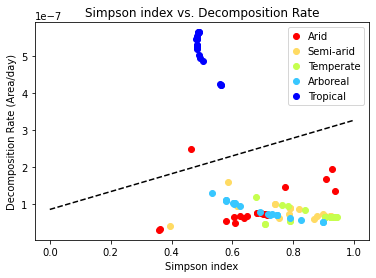

In [112]:
##SIMPSON INDEX VS DECOMPOSITION
climates=["Arid","Semi-arid","Temperate","Arboreal","Tropical"]

fig=plt.figure()
ax=fig.add_subplot(111)
for c in range(5):
  # print(c)
  simpson=[]
  result_A=results_A[c]
  result_v=results_v[c]
  result_p=results_p[c]
  for i in range(len(result_A)):
    simpson.append(sum(np.array(result_A[i])**2))
  #print(simpson)
  ax.scatter(simpson, np.array(result_p),color=(rgbs[c][0]/255,rgbs[c][1]/255,rgbs[c][2]/255),label=climates[c])
ax.plot([0,1],[p_intercept,p_intercept+p_slope*1],'--',color='black')
# fig.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("Simpson index")
plt.legend(loc="upper right")
plt.ylabel("Decomposition Rate (Area/day)")
plt.title("Simpson index vs. Decomposition Rate")
plt.savefig("simpson-decomposition.png",dpi=400,bbox_inches="tight")
plt.show()


NameError: ignored

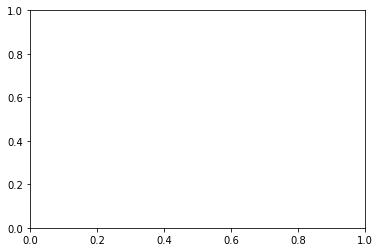

In [12]:
##I VS DECOMPOSITION

climates=["Arid","Semi-arid","Temperate","Arboreal","Tropical"]

fig=plt.figure()
ax=fig.add_subplot(111)
for c in range(5):
  # print(c)
  simpson=[]
  result_A=results_A[c]
  result_v=results_v[c]
  result_p=results_p[c]
  result_I=34-np.array(results_I[c])
  #print(simpson)
  if c==5: ax.scatter(result_I, np.array(result_p)*(result_v),color=(rgbs[c][0]/255,rgbs[c][1]/255,rgbs[c][2]/255),label=climates[c])
#ax.plot([0,1],[p_intercept,p_intercept+p_slope*1],'--',color='black')
# fig.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("Number of isolates")
plt.legend(loc="upper right")
plt.ylabel("Decomposition Rate (Area/day)")
plt.title("Number of isolates vs. Decomposition rate")
plt.savefig("simpson-decomposition.png",dpi=400,bbox_inches="tight")
plt.show()

In [8]:
successful=[]
for c in range(5):
  successful.append([])
  for i in range(len(elo)):
    tot=0
    for n in range(0, len(results_A[c])):
      tot+=results_A[c][n][i]/len(results_A[c])/sum(results_A[c][n])
    successful[c].append(tot)

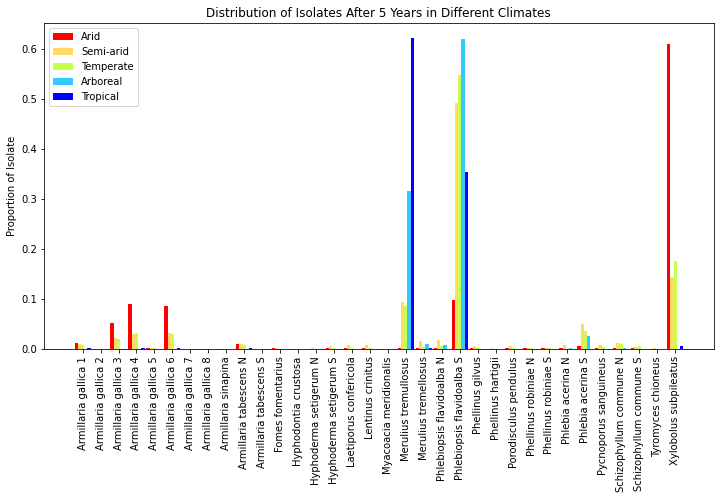

In [13]:
plt.figure(figsize=(12,6))
x=np.arange(len(data["isolate"]))
width=0.18
plt.bar(x-2*width,successful[0],width,color=(rgbs[0][0]/255,rgbs[0][1]/255,rgbs[0][2]/255),label=climates[0])
plt.bar(x-width,successful[1],width,color=(rgbs[1][0]/255,rgbs[1][1]/255,rgbs[1][2]/255),label=climates[1])
plt.bar(x,successful[2],width,color=(rgbs[2][0]/255,rgbs[2][1]/255,rgbs[2][2]/255),label=climates[2])
plt.bar(x+width,successful[3],width,color=(rgbs[3][0]/255,rgbs[3][1]/255,rgbs[3][2]/255),label=climates[3])
plt.bar(x+2*width,successful[4],width,color=(rgbs[4][0]/255,rgbs[4][1]/255,rgbs[4][2]/255),label=climates[4])
plt.legend()
plt.xticks(x,data["isolate"],rotation=90)
plt.title("Distribution of Isolates After 5 Years in Different Climates")
plt.ylabel("Proportion of Isolate")
plt.savefig("distribution.png",dpi=400,bbox_inches="tight")
plt.show()

In [114]:
import statistics
variances=[]
for c in range(5):
  variances.append([])
  for n in range(0, len(results_A[c])):
    x,y,rd=climate_coords[c][n]
    variances[c].append(statistics.variance([get_mpa(t, x, y) for t in range(years*365)]))

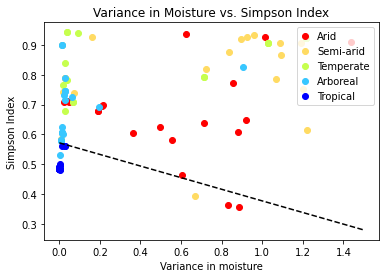

In [115]:
fig=plt.figure()
ax=fig.add_subplot(111)
for c in range(5):
  # print(c)
  simpson=[]
  result_A=results_A[c]
  result_v=results_v[c]
  result_p=results_p[c]
  for i in range(len(result_A)):
    simpson.append(sum(np.array(result_A[i])**2))
  ax.scatter(variances[c],simpson,color=(rgbs[c][0]/255,rgbs[c][1]/255,rgbs[c][2]/255),label=climates[c])
ax.plot([0,1.5],[simpson_intercept,simpson_intercept+simpson_slope*1.5],'--',color='black')

# fig.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("Variance in moisture")
plt.legend(loc="upper right")
plt.ylabel("Simpson Index")
plt.title("Variance in Moisture vs. Simpson Index")
plt.savefig("variance-simpson.png",dpi=400,bbox_inches="tight")
plt.show()


In [183]:
results_v_adj=np.array(results_v)
for c in range(5):
  for n in range(len(results_v_adj[c])):
    results_v_adj[c][n]=np.array(results_p[c][n])/sum(np.array(results_A[c][n]))

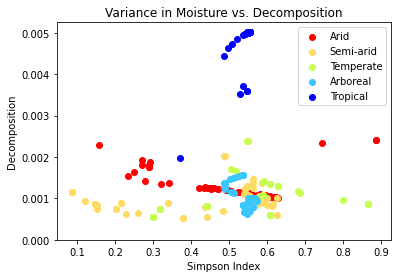

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)
for c in range(5):
  # print(c)
  simpson=[]
  result_A=results_A[c]
  result_v_adj=results_v_adj[c]
  result_p=results_p[c]
  for i in range(len(result_A)):
    simpson.append(sum(np.array(result_A[i])**2))
  ax.scatter(simpson,np.array(result_v_adj),color=(rgbs[c][0]/255,rgbs[c][1]/255,rgbs[c][2]/255),label=climates[c])
#ax.plot([0,1.2],[simpson_intercept,simpson_intercept+simpson_slope*1.2],'--',color='black')

# fig.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("Simpson Index")
plt.legend(loc="upper right")
plt.ylabel("Decomposition")
plt.ylim(0)
plt.title("Variance in Moisture vs. Decomposition")
plt.savefig("variance-decomp.png",dpi=400,bbox_inches="tight")
plt.show()

In [ ]:
arid_array=np.array(climate_coords[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
pd.DataFrame(np.array(climate_coords[4])[:,:2]).to_csv("tropical.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [22]:
variances_flat=[]
for c in range(len(variances)):
  for n in range(len(variances[c])):
    variances_flat.append(variances[c][n])
pd.DataFrame(np.array(variances)).to_csv("variances.csv")

In [23]:
p_flat=[]
for c in range(len(results_p)):
  for n in range(len(results_p[c])):
    p_flat.append(results_p[c][n])
pd.DataFrame(np.array(variances)).to_csv("p.csv")

In [24]:
simpson_flat=[]
for c in range(len(results_A)):
  result_A=results_A[c]
  for i in range(len(result_A)):
    simpson_flat.append(sum(np.array(result_A[i])**2))
pd.DataFrame(np.array(variances)).to_csv("simpson.csv")

In [25]:
from scipy import stats


x=np.array(variances_flat)#.reshape(-1,1)
y=np.array(simpson_flat)#.reshape(-1,1)

simpson_slope, simpson_intercept, simpson_r_value, simpson_p_value, simpson_std_err = stats.linregress(x,y)
# model=LinearRegression()
# model.fit(x,y)

In [26]:
print(simpson_slope)
print(simpson_intercept)
print(simpson_r_value**2)
print(simpson_p_value)
print(simpson_std_err)

-0.19432914065037413
0.5720267459791708
0.4211989701542286
2.7752994419920014e-31
0.014465487921984165


In [27]:
x=np.array(simpson_flat)#.reshape(-1,1)
y=np.array(p_flat)#.reshape(-1,1)

p_slope, p_intercept, p_r_value, p_p_value, p_std_err = stats.linregress(x,y)

In [28]:
print(p_slope)
print(p_intercept)
print(p_r_value**2)
print(p_p_value)
print(p_std_err)

2.4047746295981967e-07
8.594209857562662e-08
0.02787028562204882
0.00816970513778535
9.018616927590394e-08


In [58]:
for c in range(5):
  print(climates[c])
  print("variance "+str(mean(variances[c])))
  simpson=[]
  result_A=results_A[c]
  result_v_adj=results_v_adj[c]
  result_p=results_p[c]
  for i in range(len(result_A)):
    simpson.append(sum(np.array(result_A[i])**2))
  print("simpson "+str(mean(simpson)))
  print("decomp "+str(mean(result_v_adj[c])))

Arid
variance 0.55042710818567
simpson 0.4921819360129993
decomp 0.0017472090455545306
Semi-arid
variance 0.6678038480844917
simpson 0.4202226306951397
decomp 0.0005495583730897805
Temperate
variance 0.5048076282924793
simpson 0.5169503888347584
decomp 0.0008148620986890363
Arboreal
variance 0.04603319558507342
simpson 0.5390416570768726
decomp 0.0009406796570289443
Tropical
variance 0.031780789935759286
simpson 0.5417789848937447
decomp 0.0050127099524786105
